# importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reading file

In [2]:
df = pd.read_csv('Realstate.csv')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Chenging the header name of each columns

In [4]:
df = df.rename({'X1 transaction date':'transaction date','X2 house age' : 'house age','X3 distance to the nearest MRT station':'nearest MRT station',
               'X4 number of convenience stores':'number of convenience stores','X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'house price of unit area'},axis=1)

In [5]:
df.columns

Index(['No', 'transaction date', 'house age', 'nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [6]:
df.head(10)

,No,transaction date,house age,nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


# Changing data type of transaction date to datetime

In [7]:
df['transaction date'] = pd.to_datetime(df['transaction date'], format='%y%m%d')


# Checking Relationship of Dataset

In [8]:
df.drop('No', axis='columns' ,inplace=True)

df.corr()

,house age,nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

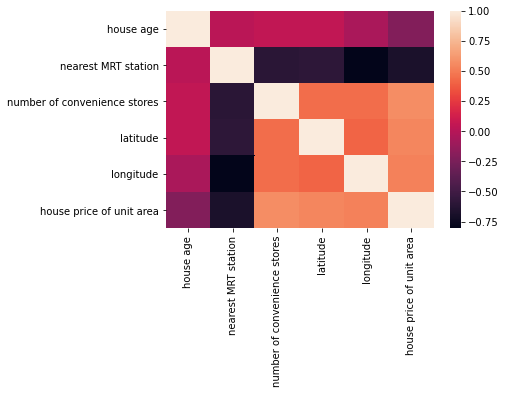

In [9]:
sns.heatmap(df.corr())

# Building a model

## Creating Multiple Linear Regression model 

In [10]:
X = df.drop(['house price of unit area','transaction date'],axis =1).values

Y = df['house price of unit area'].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state = 20)

In [11]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train,Y_train)
Linear_Model.coef_

array([-2.71614437e-01, -3.92821265e-03,  1.23542660e+00,  2.54179506e+02,
       -1.41886387e+01])

In [17]:
Y_hat = Linear_Model.predict(X_test)
print(Y_hat)

Linear_Model.predict([[32.0,84.87882,10,24.98298,121.54024]]) #testing the Model with sample data

print(Linear_Model.predict([[32.0,84.87882,10,24.98298,121.54024]]))

[43.31812109 50.462226   29.83026973 41.33307034 42.05540589 37.95470865
 30.0120387  29.80322968 34.76697494 32.7541325  30.43952266 37.40246174
 51.68610515 49.20966482 33.14660829 14.14322538 41.91500279 44.28052731
 39.71818569 49.39007351 14.60854886 45.141394   54.36115806 32.9729171
 38.19100601 14.39241302 31.44493359 40.12932867 52.25085635 38.53630755
 34.8887677  38.22441881 33.49156803 37.57068073 50.06665088 46.19818048
 45.3641605  38.16384457 40.99451277 44.71457425 54.44264239 30.80174307
 45.7092745  45.30395548 44.65182262 47.22922205 45.57346728 35.8177441
 39.1211613  10.68902594 31.65330026 48.35535884 44.78762984 44.85627663
 47.22922205 45.57346728 39.26475399 33.19020865 39.19503176 44.30768876
 52.19653347 30.06335044 29.77594684 44.32399251 38.62662798 30.28365314
 35.44452259 48.34567476 41.67058083 35.67470482 52.2780178  49.69244959
 36.84866998 43.49155385 47.79259133 29.29060276 23.78147717 36.98131126
 36.20240164 37.47734277 22.79574587 44.95956341 38.2

In [18]:
r2_score(Y_test,Y_hat) # checking the Accuracy of model

print(r2_score(Y_test,Y_hat)*100)

64.32706204410114


Text(0, 0.5, 'Predicted Price')

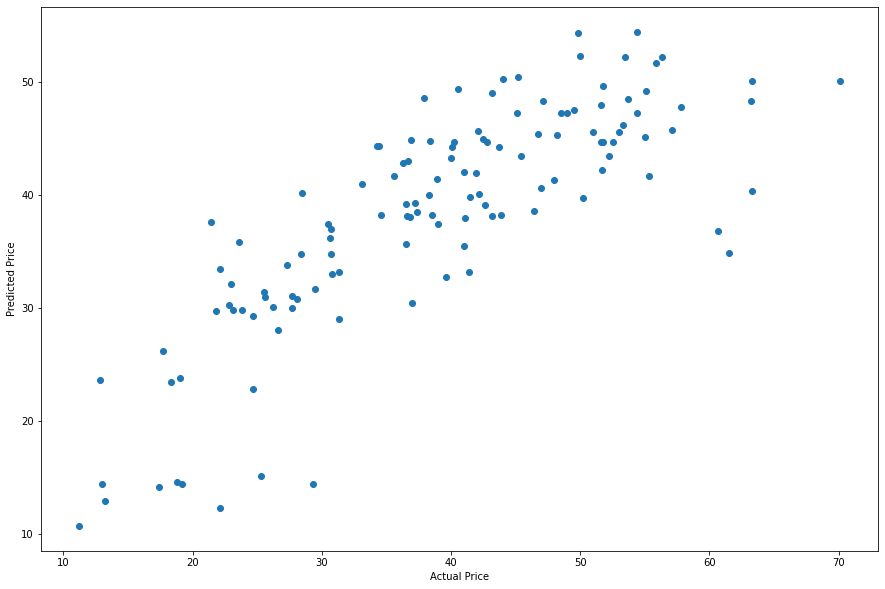

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_hat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")


In [15]:
predict_y_df = pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_hat,'Difference':Y_test-Y_hat})
predict_y_df.head(10)

,Actual Value,Predicted Value,Difference
0,40.0,43.318121,-3.318121
1,45.2,50.462226,-5.262226
2,23.8,29.830270,-6.030270
3,48.0,41.333070,6.666930
4,41.0,42.055406,-1.055406
5,41.1,37.954709,3.145291
6,27.7,30.012039,-2.312039
7,23.1,29.803230,-6.703230
8,30.7,34.766975,-4.066975
9,39.6,32.754133,6.845867


#  Show the Relationship bettween featurs and traget 

<AxesSubplot:>

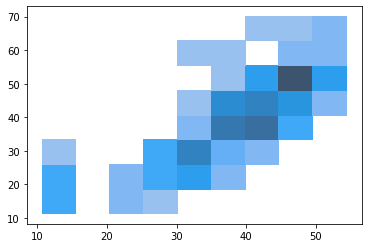

In [16]:
sns.histplot(x=Y_hat,y=Y_test)

# Deploy the model